<a href="https://colab.research.google.com/github/Francesfahey/forecastingCA/blob/main/FORECASTINGCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Francesfahey/forecastingCA/main/archive.csv')

# show top records in the df
df.head

In [ ]:

fig = plt.figure()
plt.plot(df.Month, df['Carbon Dioxide (ppm)'])

plt.title('carbon dioxide levels in hawaii ')
plt.xlabel('Month')
plt.ylabel('Carbon Dioxide (ppm)')

plt.xticks(rotation = 100, ha='right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()
plt.savefig('CO2_levels.png', dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))

ax.plot(df['Month'], df['Carbon Dioxide (ppm)'])
for i in np.arange(0, 70, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('month')
ax.set_ylabel('Carbon Dioxide (ppm)')

plt.xticks(np.arange(0, 61, 12), np.arange(0, 61, 12))


fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('fig_seasonal.png', dpi=300)

In [ ]:
decomposition = STL(df['Carbon Dioxide (ppm)'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 61, 12), np.arange(0, 61, 12))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('fig_decomp.png', dpi=300)

In [ ]:
linear_ts = np.arange(0, 144, 1)

decomposition = STL(linear_ts, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
ax4.set_ylim(-1, 1)

plt.xticks(np.arange(0, 61, 12), np.arange(0, 61, 12))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('fig_residuals.png', dpi=300)

In [ ]:
ADF_result = adfuller(df['Carbon Dioxide (ppm)'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

In [ ]:
plot_acf(df['Carbon Dioxide (ppm)'], lags=20);

plt.tight_layout()
plt.savefig('fig_CO2_1.png', dpi=300)

In [ ]:
C02_diff = np.diff(df['Carbon Dioxide (ppm)'], n=1)
print(C02_diff)

[ 1.    0.45  1.25  0.02 -0.29 -0.66 -2.34 -1.05 -0.52  1.57  0.55  1.2
  0.97  0.8   1.31  0.38 -0.33 -1.36 -2.03 -1.72 -0.54  1.69  1.24  1.29
  0.18  0.54  1.38  0.58 -0.91 -1.54 -1.63 -1.67  0.14  1.33  1.24  0.61
  0.57  0.75  1.13  0.55 -0.21 -1.22 -2.03 -1.78 -0.08  1.07  1.57  1.11
  0.42  1.21  1.03  0.72 -0.68 -0.82 -2.22 -1.28 -0.6   1.07  1.27]


In [ ]:
ADF_result = adfuller(C02_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.5824632724892767
p-value: 0.09667619014146644


In [ ]:
C02_diff2 = np.diff(df['Carbon Dioxide (ppm)'], n=2)
print(C02_diff)

[ 1.    0.45  1.25  0.02 -0.29 -0.66 -2.34 -1.05 -0.52  1.57  0.55  1.2
  0.97  0.8   1.31  0.38 -0.33 -1.36 -2.03 -1.72 -0.54  1.69  1.24  1.29
  0.18  0.54  1.38  0.58 -0.91 -1.54 -1.63 -1.67  0.14  1.33  1.24  0.61
  0.57  0.75  1.13  0.55 -0.21 -1.22 -2.03 -1.78 -0.08  1.07  1.57  1.11
  0.42  1.21  1.03  0.72 -0.68 -0.82 -2.22 -1.28 -0.6   1.07  1.27]


In [ ]:
ADF_result = adfuller(C02_diff2)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -12.346652177769334
p-value: 5.951525041033767e-23


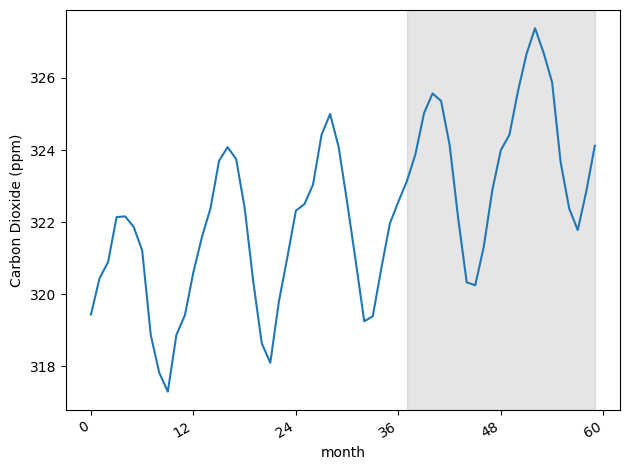

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Carbon Dioxide (ppm)'])
ax.set_xlabel('month')
ax.set_ylabel('Carbon Dioxide (ppm)')
ax.axvspan(37, 59, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 61, 12), np.arange(0, 61, 12))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('fig_train.png', dpi=300)

In [ ]:
def optimize_ARIMA(train, order_list, d) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(train, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
def optimize_SARIMA(train, order_list, d, D, s) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                train, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]

d = 2
D = 0
s = 12

ARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Carbon Dioxide (ppm)'][:-12]

ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)
ARIMA_result_df

  0%|          | 0/169 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(12, 1, 0, 0)",70.183654
1,"(11, 2, 0, 0)",70.312317
2,"(11, 3, 0, 0)",71.043271
3,"(11, 1, 0, 0)",71.126496
4,"(11, 4, 0, 0)",71.130545
...,...,...
150,"(9, 11, 0, 0)",270189.205164
151,"(10, 11, 0, 0)",270191.208225
152,"(11, 11, 0, 0)",270193.188556
153,"(12, 11, 0, 0)",270195.142709


In [ ]:
ps = range(0, 12, 1)
qs = range(0, 12, 1)
Ps = range(0, 12, 1)
Qs = range(0, 12, 1)

SARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Carbon Dioxide (ppm)'][:-12]

d = 2
D = 1
s = 12

SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/20736 [00:00<?, ?it/s]

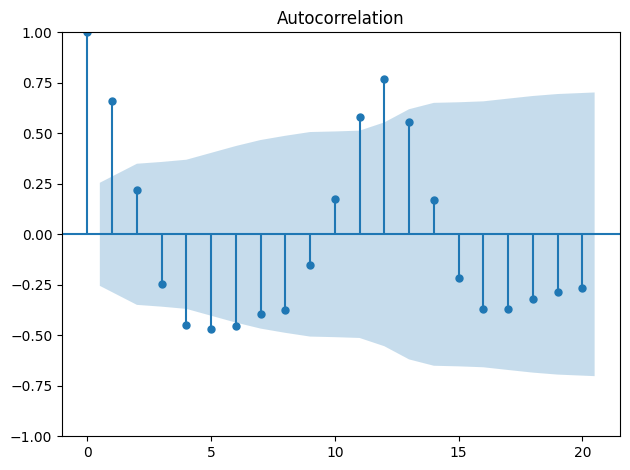

In [ ]:
plot_acf(C02_diff, lags=20);


plt.tight_layout()
plt.savefig('fig_passengers.png', dpi=300)